In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('../assets/data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df.describe()

,Unadjusted,Seasonally adjusted
count,3.130000e+02,3.130000e+02
mean,2.889650e+07,2.892420e+07
std,9.627899e+06,9.154554e+06
min,1.215432e+07,1.502689e+07
25%,2.043227e+07,2.060535e+07
50%,2.836326e+07,2.802076e+07
75%,3.701433e+07,3.651517e+07
max,5.001614e+07,4.595210e+07


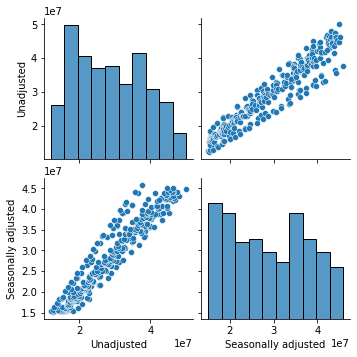

In [3]:
sns.pairplot(df)

In [4]:
df

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083
...,...,...,...
308,Sep-2016,45528702,44534797
309,Oct-2016,44770113,45061618
310,Nov-2016,46285062,45141762
311,Dec-2016,50016137,44943929


             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


<AxesSubplot:xlabel='Adjustments'>

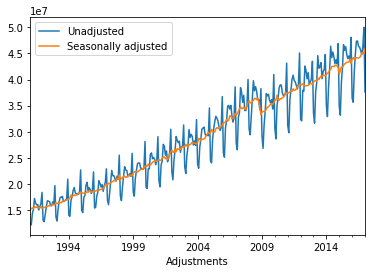

In [5]:
# Preprocessing
from pandas.tseries.offsets import MonthEnd

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
print(df.head())
df.plot()

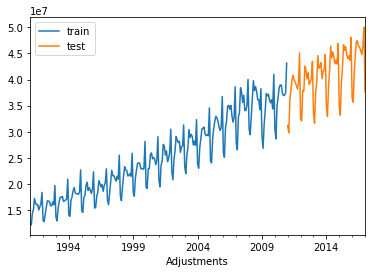

In [6]:
# Training and test set
split_date = pd.Timestamp('01-01-2011')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]
# Feature는 Unadjusted 한 개

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [7]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.339

In [8]:
x_input = np.array([7,8,9,10]) # (4,)
x_input = x_input.reshape(1,4)
print(x_input)

[[ 7  8  9 10]]


In [13]:
# Converting to dataframe
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

for s in range(1, 5):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(5)

,Scaled,shift_1,shift_2,shift_3,shift_4
Adjustments,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.01402,NaN
1991-05-31,0.163628,0.095318,0.070426,0.00000,0.01402


In [14]:
# Training and test set
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [19]:
# Converting to ndarray
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)


(236, 4)
[[0.09531795 0.0704258  0.         0.01402033]
 [0.16362761 0.09531795 0.0704258  0.        ]
 [0.13514108 0.16362761 0.09531795 0.0704258 ]
 [0.12395846 0.13514108 0.16362761 0.09531795]
 [0.12617398 0.12395846 0.13514108 0.16362761]
 [0.09230917 0.12617398 0.12395846 0.13514108]
 [0.11139526 0.09230917 0.12617398 0.12395846]
 [0.13173822 0.11139526 0.09230917 0.12617398]
 [0.20091289 0.13173822 0.11139526 0.09230917]
 [0.03002688 0.20091289 0.13173822 0.11139526]
 [0.01999285 0.03002688 0.20091289 0.13173822]
 [0.06596369 0.01999285 0.03002688 0.20091289]
 [0.10983126 0.06596369 0.01999285 0.03002688]
 [0.14912986 0.10983126 0.06596369 0.01999285]
 [0.14718865 0.14912986 0.10983126 0.06596369]
 [0.14464787 0.14718865 0.14912986 0.10983126]
 [0.11898427 0.14464787 0.14718865 0.14912986]
 [0.11802682 0.11898427 0.14464787 0.14718865]
 [0.14222108 0.11802682 0.11898427 0.14464787]
 [0.12459168 0.14222108 0.11802682 0.11898427]
 [0.24290801 0.12459168 0.14222108 0.11802682]
 [0.

In [ ]:
# reshape(size, timestep, feature)
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

In [ ]:
# LSTM
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential() # Sequeatial Model
model.add(tf.keras.layers.LSTM(20, input_shape=(12, 1))) # (timestep, feature)
model.add(tf.keras.layers.Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


In [ ]:
# Training the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

In [ ]:
print(X_test_t)
y_pred = model.predict(X_test_t)
print(y_pred)